In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

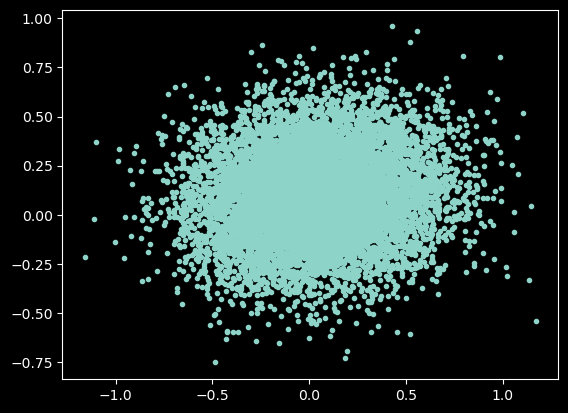

Optimal Strategy


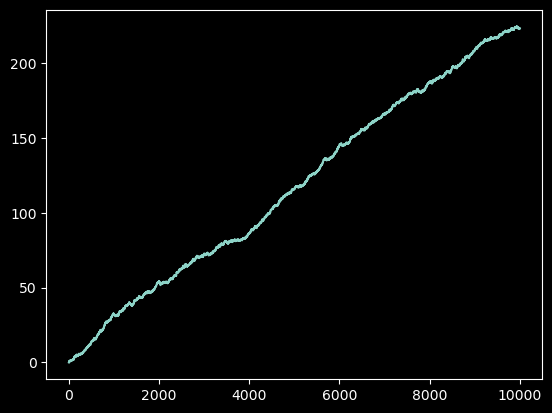

Statistics
cov(x, w):  0.007 0.005000000000000001
cov(x, x):  0.098 0.1005
cov(w, w):  0.05 0.05000000000000001
E[s]:  0.022 0.021
E[s^2]:  0.022 0.021811
var[s]:  0.021 0.021370000000000004
Sharpe[s]:  0.15268554246794808
De-mean Strategy


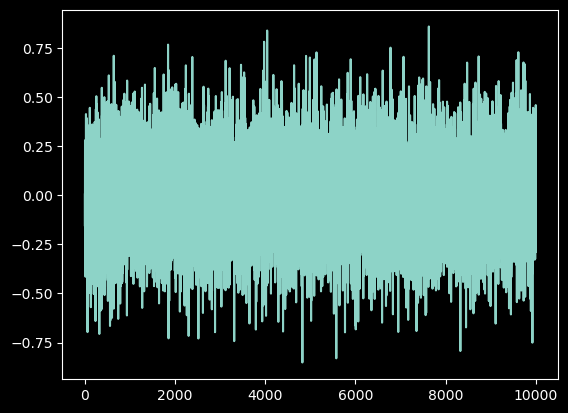

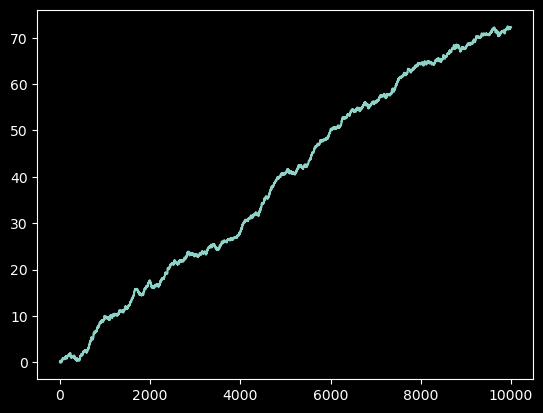

Statistics
E[s]:  0.007 0.005000000000000001
E[s^2]:  0.005 0.005155000000000001
STD[s]:  0.07183295916497719
var[s]:  0.005 0.005130000000000001
Sharpe[s]:  0.10060434391496671
Theo sharpe:  0.15268554246794808 0.32334332315224346
Theo sharpe:  0.15268554246794808 0.19004706301495827


In [16]:
n = 10000
# parameters
m = 0.1
q = 0.05
a = 0.03
b = 0.1
p = 0.1
# generate z
z = np.random.normal(m, np.sqrt(q), n)
x = a + b*z + np.random.normal(0, np.sqrt(p), n)
plt.plot(x, z, '.')
plt.show()
# weight
w = (a + b*z)/p
# strategy
print('Optimal Strategy')
s = w*x
plt.plot(np.cumsum(s))
plt.show()
print('Statistics')
print('cov(x, w): ', np.round(np.cov(x, w)[0][1],3), b*b*q/p) 
print('cov(x, x): ', np.round(np.cov(x, x)[0][1],3), b*b*q+p) 
print('cov(w, w): ', np.round(np.cov(w, w)[0][1],3), b*b*q/p/p) 
print('E[s]: ', np.round(np.mean(s), 3), b*b*q/p + np.power(a+b*m,2)/p)
y = a+b*m
print('E[s^2]: ', np.round(np.mean(np.power(s,2)),3), (y*y*y*y+6*y*y*q*b*b+3*b*b*b*b*q*q+y*y*p+b*b*q*p)/p/p)
print('var[s]: ', np.round(np.var(s),3), (y*y*(p+4*q*b*b) + 2*b*b*b*b*q*q + b*b*q*p)/p/p )
max_sr = np.mean(s)/np.std(s)
print('Sharpe[s]: ', np.mean(s)/np.std(s))

print('De-mean Strategy')
w = b*(z-m)/p
plt.plot(w)
plt.show()
s = w*x
plt.plot(np.cumsum(s))
plt.show()
print('Statistics')
print('E[s]: ', np.round(np.mean(s), 3), b*b*q/p)

print('E[s^2]: ', np.round(np.mean(np.power(s,2)),3), (3*b*b*b*b*q*q + b*b*q*p + b*b*q*y*y)/p/p)
print('STD[s]: ', np.std(s))
print('var[s]: ', np.round(np.var(s),3), (y*y*q*b*b + 2*b*b*b*b*q*q + b*b*q*p)/p/p )
print('Sharpe[s]: ', np.mean(s)/np.std(s))
print('Theo sharpe: ', max_sr, np.mean(s)/np.std(s) + y*y/p/np.sqrt(np.var(s)) )
print('Theo sharpe: ', max_sr, np.mean(s)/np.std(s) + (a+b*m)/b*np.sqrt(q) )


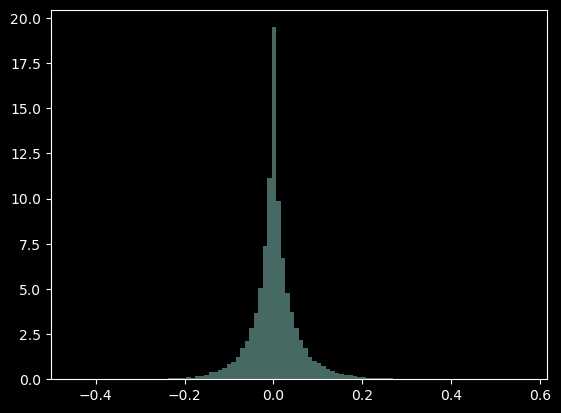

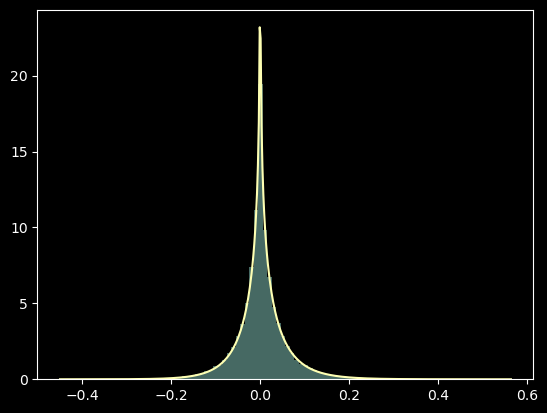

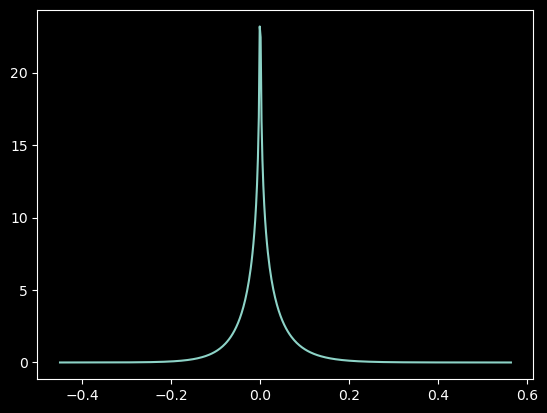

In [4]:
from scipy.special import kn
from scipy.special import comb
from scipy.special import factorial

def prod_density(x, m1, m2, rho, s1, s2, max_n = 5):
    '''
    Implementation of pdf for product of two normal densities
    taken from
        Exact Distribution for the Product of Two
        Correlated Gaussian Random Variables
        Guolong Cui, Xianxiang Yu, Salvatore Iommelli and Lingjiang Kong
    '''
    t1 = np.exp(-1*(m1*m1/s1/s1 + m2*m2/s2/s2 - 2*rho*(x + m1*m2)/s1/s2)/2/(1-rho*rho))
    t2 = np.zeros_like(x)
    for n in range(0, max_n):
        for m in range(0, 2*n+1):
            tmp = np.power(x, 2*n-m)*np.power(np.abs(x), m-n)*np.power(s1, m-n-1)
            tmp /= (np.pi*factorial(2*n)*np.power(1-rho*rho, 2*n+0.5)*np.power(s2, m-n+1))
            tmp *= comb(2*n, m)
            tmp *= np.power(m1/s1/s1 - rho*m2/s1/s2, m)
            tmp *= np.power(m2/s2/s2 - rho*m1/s1/s2, 2*n-m)
            tmp *= kn( m-n, np.abs(x) / (s1*s2*(1-rho*rho)) )
            t2 += tmp    
    return t1*t2

# NOTE
# NORMAL PRODUCT DISTRIBUTION 
# ** if m1<scale1, m2<scale2, rho<0.5 then we just need the case
# with n=0, m=0 for a reasonable approximation!

m = np.array([0.1, -0.05])
scales = np.array([0.5, 0.1])
rho = 0.15
c = np.diag(scales) @ np.array([[1, rho],[rho, 1]]) @np.diag(scales)
n = 50000
samples = np.random.multivariate_normal(m, c, n)
x = samples[:,0]*samples[:,1]

x_pdf=np.linspace(np.min(x), np.max(x), 500)
y_pdf=prod_density(x_pdf, m[0], m[1], rho, scales[0], scales[1], max_n = 2)

plt.hist(x, density = True, alpha = 0.5, bins = 100)
plt.show()
plt.hist(x, density = True, alpha = 0.5, bins = 100)
plt.plot(x_pdf, y_pdf)
plt.show()
plt.plot(x_pdf, y_pdf)
plt.show()
